In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyproj

In [2]:
print(pyproj.pj_list)

{'adams_hemi': 'Adams Hemisphere in a Square', 'adams_ws1': 'Adams World in a Square I', 'adams_ws2': 'Adams World in a Square II', 'aea': 'Albers Equal Area', 'aeqd': 'Azimuthal Equidistant', 'affine': 'Affine transformation', 'airy': 'Airy', 'aitoff': 'Aitoff', 'alsk': 'Modified Stereographic of Alaska', 'apian': 'Apian Globular I', 'august': 'August Epicycloidal', 'axisswap': 'Axis ordering', 'bacon': 'Bacon Globular', 'bertin1953': 'Bertin 1953', 'bipc': 'Bipolar conic of western hemisphere', 'boggs': 'Boggs Eumorphic', 'bonne': 'Bonne (Werner lat_1=90)', 'calcofi': 'Cal Coop Ocean Fish Invest Lines/Stations', 'cart': 'Geodetic/cartesian conversions', 'cass': 'Cassini', 'cc': 'Central Cylindrical', 'ccon': 'Central Conic', 'cea': 'Equal Area Cylindrical', 'chamb': 'Chamberlin Trimetric', 'collg': 'Collignon', 'col_urban': 'Colombia Urban', 'comill': 'Compact Miller', 'crast': 'Craster Parabolic (Putnins P4)', 'defmodel': 'Deformation model', 'deformation': 'Kinematic grid shift', '

c:\Users\Charlie\Documents\GitHub\mapping-challenge\.venv\Lib\site-packages\geopandas\_compat.py:153: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  set_use_pygeos()
C:\Users\Charlie\AppData\Local\Temp\ipykernel_13016\4260405061.py:1: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


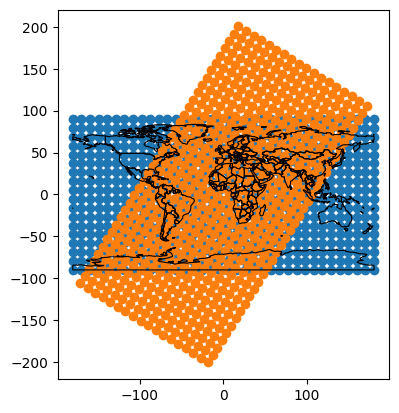

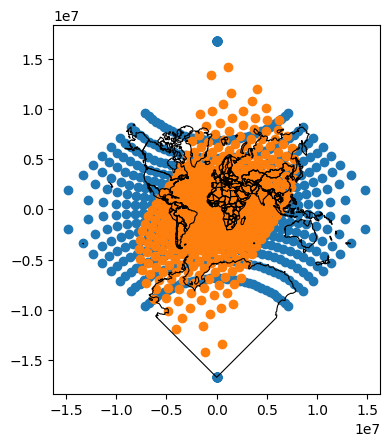

In [3]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import math

# Define Plate Carrée projection
transform_proj = pyproj.Proj(proj="adams_ws2",lat_0=0,lon_0=0)

# Load world countries geometries from a shapefile
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Set CRS for the GeoDataFrame (assuming WGS84)
world.crs = 'EPSG:4326'

# Create a regular grid of points covering the world
lons = np.linspace(-180, 180, 36)
lats = np.linspace(-90, 90, 18)

# Create a meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Flatten the grids for processing
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

def rotator(x,y,theta):
    x_d = x*math.cos(theta)-y*math.sin(theta)
    y_d = x*math.sin(theta)+y*math.cos(theta)
    return x_d,y_d

lon_rot,lat_rot = rotator(lon_flat,lat_flat,45)

x,y = transform_proj(lon_flat,lat_flat)
x_rot,y_rot = transform_proj(lon_rot,lat_rot)


# Plot country boundaries
plt.figure()
world.boundary.plot(ax=plt.gca(), color='black', linewidth=0.8)
plt.scatter(lon_flat,lat_flat)
plt.scatter(lon_rot,lat_rot)
plt.show()

# Project country geometries to Plate Carrée projection
plt.figure()
world = world.to_crs(transform_proj.srs)
world.boundary.plot(ax=plt.gca(), color='black', linewidth=0.8)
plt.scatter(x,y)
plt.scatter(x_rot,y_rot)
plt.show()


In [4]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import math
import shapely as sh
import pandas as pd

In [5]:
def get_coords_from_polygon(shape):
    coords = set()

    if isinstance(shape, sh.geometry.Polygon):
        coords.update(shape.exterior.coords[:-1])
        for linearring in shape.interiors:
            coords.update(linearring.coords[:-1])
    elif isinstance(shape, sh.geometry.MultiPolygon):
        for polygon in shape:
            coords.update(get_coords_from_polygon(polygon))

    x = []
    y = []
    for coord in coords:
        x.append(coord[0])
        y.append(coord[1])

    return [x,y]

In [6]:
# Load world countries geometries from a shapefile
world = gpd.read_file("ne_10m_ocean.shp")

# Set CRS for the GeoDataFrame (assuming WGS84)
world.crs = 'EPSG:4326'

world_points = world.get_coordinates()

In [7]:
world_points_duplicate = world_points.copy()

In [8]:
# world_points_duplicate['x'] = world_points_duplicate['x']+360
# world_points = pd.concat([world_points,world_points_duplicate])

In [9]:
# https://storymaps.arcgis.com/stories/756bcae18d304a1eac140f19f4d5cb3d

    # Geographic Coordinate System: GCS WGS 1984
    # Projection: Adams Square II
    # False Easting: 0 m
    # False Northing: 0 m
    # Scale Factor: 1
    # Azimuth: 40.17823482°
    # Longitude of Center: 66.94970198°E
    # Latitude of Center: 49.56371678°S
    # XY Plane Rotation: 45°

In [10]:
def transform(lon,lat,lon_off,lat_off):
    lon = (lon+lon_off+180)%360-180
    lat = (lat+lat_off+90)%180-90
    return lon,lat

# x-y rotation
def rotator(x,y,theta):
    theta = theta*math.pi/180
    x_d = x*math.cos(theta)-y*math.sin(theta)
    y_d = x*math.sin(theta)+y*math.cos(theta)
    return x_d,y_d

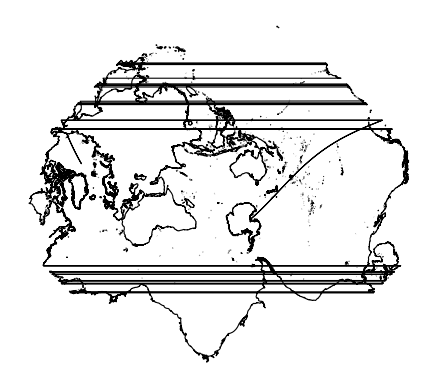

In [11]:
# Define projection
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-66.95+90, o_lon_p=49.56+180, lon_0=40.18-90) 
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-65+90, o_lon_p=30+180, lon_0=40-90) 

# Create a regular grid of points covering the world
lons = np.linspace(-180, 180, 36)
lats = np.linspace(-90, 90, 18)

# Create a meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Flatten the grids for processing
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()


w_lon = world_points['x']
w_lat = world_points['y']

x,y = transform_proj(lon_flat,lat_flat)
w_x,w_y = transform_proj(world_points['x'],world_points['y'])

angle = -0

x_rot,y_rot = rotator(x,y,angle)
w_x_rot,w_y_rot = rotator(w_x,w_y,angle)
w2_x_rot,w2_y_rot = rotator(w_x_rot,w_y_rot,90)
w2_x_rot = w2_x_rot+(w2_x_rot.max()-w2_x_rot.min())

# Project country geometries
plt.figure()
# plt.scatter(x_rot,y_rot,s=1)
# plt.scatter(w_x_rot,w_y_rot,s=0.01)
# plt.scatter(w2_x_rot,w2_y_rot,s=0.01)
world_new = world.to_crs(transform_proj.srs)
world_new.boundary.plot(ax=plt.gca(), color='black', linewidth=0.8)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()



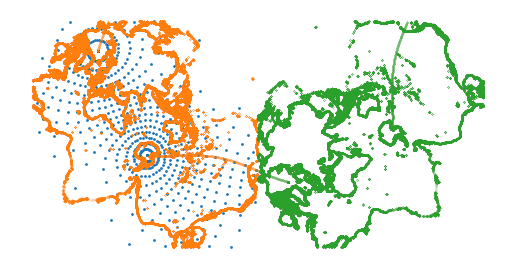

In [12]:
# Define projection
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-66.95+90, o_lon_p=49.56+180, lon_0=40.18-90) 
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-65+90, o_lon_p=30+180, lon_0=40-90) 

# Create a regular grid of points covering the world
lons = np.linspace(-180, 180, 36)
lats = np.linspace(-90, 90, 18)

# Create a meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Flatten the grids for processing
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()


w_lon = world_points['x']
w_lat = world_points['y']

x,y = transform_proj(lon_flat,lat_flat)
w_x,w_y = transform_proj(world_points['x'],world_points['y'])

angle = -45

x_rot,y_rot = rotator(x,y,angle)
w_x_rot,w_y_rot = rotator(w_x,w_y,angle)
w2_x_rot,w2_y_rot = rotator(w_x_rot,w_y_rot,90)
w2_x_rot = w2_x_rot+(w2_x_rot.max()-w2_x_rot.min())

# Project country geometries
plt.figure()
plt.scatter(x_rot,y_rot,s=1)
plt.scatter(w_x_rot,w_y_rot,s=0.01)
plt.scatter(w2_x_rot,w2_y_rot,s=0.01)
# world_new = world.to_crs(transform_proj.srs)
# world_new.boundary.plot(ax=plt.gca(), color='black', linewidth=0.8)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()



In [ ]:
# https://observablehq.com/@toja/spilhaus-world-ocean-map-in-a-square

# https://storymaps.arcgis.com/stories/756bcae18d304a1eac140f19f4d5cb3d

# https://observablehq.com/d/bb73e74c1685e498



In [13]:
import rioxarray
import xarray as xr
import cartopy.crs as ccrs

In [14]:
rds = rioxarray.open_rasterio("NE2_LR_LC_SR_W.tif",decode_coords="all")

In [15]:
rds

<xarray.DataArray (band: 3, y: 8100, x: 16200)>
[393660000 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
  * y            (y) float64 89.99 89.97 89.94 89.92 ... -89.94 -89.97 -89.99
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_DATETIME:        2012:07:16 09:57:53
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        Adobe Photoshop CS5 Macintosh
    TIFFTAG_XRESOLUTION:     72
    TIFFTAG_YRESOLUTION:     72
    scale_factor:            1.0
    add_offset:              0.0

In [16]:
rds = rds.coarsen(x=10).mean().coarsen(y=10).mean().astype(int)

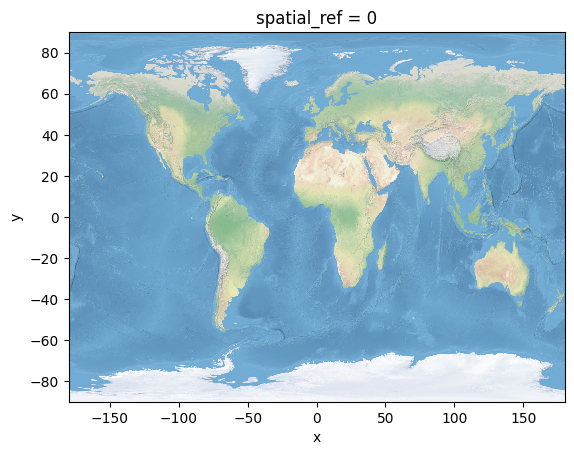

In [17]:
rds.squeeze().plot.imshow()

In [18]:
# rds["band"==1].plot.imshow()

In [191]:
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-66.95+90, o_lon_p=49.56+180, lon_0=40.18-90) 
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-65+90, o_lon_p=30+180, lon_0=27-90) 
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=-65+90, o_lon_p=23+180, lon_0=27-90) 

In [192]:
# Create a meshgrid
xv, yv = np.meshgrid(rds["x"], rds['y'])

x2, y2 = transform_proj(xv, yv)

x2, y2 = rotator(x2, y2,45)

rds.coords['x2'] = (('y', 'x'), x2)
rds.coords['y2'] = (('y', 'x'), y2)

In [193]:
# rds.mean(dim="band").plot(x="x2",y="y2")

In [194]:
# https://stackoverflow.com/questions/14120222/matplotlib-imshow-with-irregular-spaced-data-points/14140554#14140554

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

xs0 = rds.coords['x2'].values.flatten()
ys0 = rds.coords['y2'].values.flatten()
rs0 = rds.sel(band=1).values.flatten()
gs0 = rds.sel(band=2).values.flatten()
bs0 = rds.sel(band=3).values.flatten()

xs,ys = np.mgrid[xs0.min():xs0.max():(xs0.max()-xs0.min())/1000, 
                 ys0.min():ys0.max():(ys0.max()-ys0.min())/1000]

r_resampled = griddata((xs0, ys0), rs0, (xs, ys),method="nearest").astype(int)
g_resampled = griddata((xs0, ys0), gs0, (xs, ys),method="nearest").astype(int)
b_resampled = griddata((xs0, ys0), bs0, (xs, ys),method="nearest").astype(int)



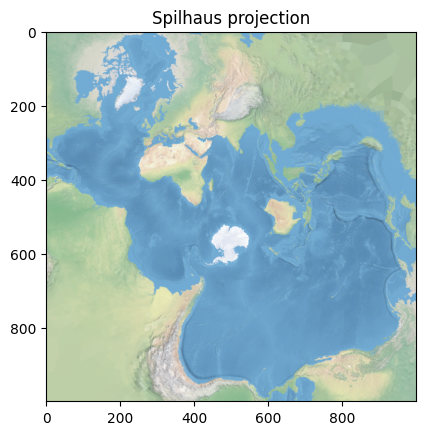

In [195]:
image_rgb = np.dstack([r_resampled,g_resampled,b_resampled])

plt.imshow(image_rgb)
plt.title("Spilhaus projection")
plt.show()

In [196]:
from PIL import Image

In [197]:
img = Image.fromarray(image_rgb.astype(np.uint8))

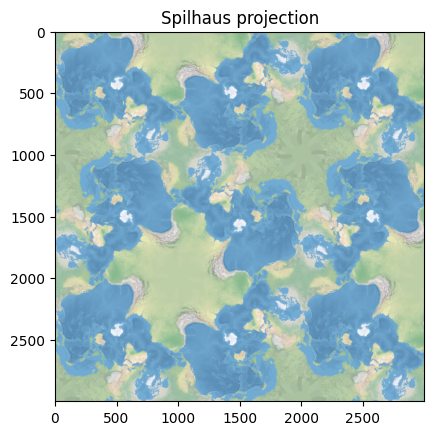

In [198]:
pixels = img.size[0]

new_im = Image.new('RGB', (pixels*3, pixels*3))

new_im.paste(img.rotate(180), (0,0))
new_im.paste(img.rotate(90), (0,pixels))
new_im.paste(img.rotate(180), (0,2*pixels))
new_im.paste(img.rotate(270), (pixels,0))
new_im.paste(img, (pixels,pixels))
new_im.paste(img.rotate(270), (pixels,2*pixels))
new_im.paste(img.rotate(180), (2*pixels,0))
new_im.paste(img.rotate(90), (2*pixels,pixels))
new_im.paste(img.rotate(180), (2*pixels,2*pixels))

plt.imshow(new_im)
plt.title("Spilhaus projection")
plt.show()

In [199]:
image_rgb.shape

(1000, 1000, 3)

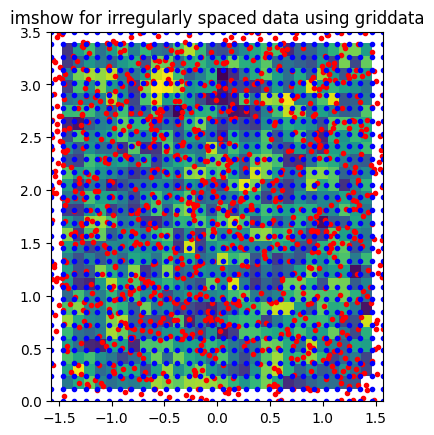

In [200]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

xs0 = np.random.random((1000)) * np.pi - np.pi/2
ys0 = np.random.random((1000)) * 3.5
zs0 = np.random.random((1000))

N = 30j
extent = (-np.pi/2,np.pi/2,0,3.5)

xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]

resampled = griddata((xs0, ys0), zs0, (xs, ys))

plt.imshow(resampled.T, extent=extent)
plt.plot(xs0, ys0, "r.")
plt.plot(xs, ys, "b.")
plt.title("imshow for irregularly spaced data using griddata")
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
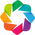

In [201]:
import numpy as np
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [202]:
# hv.RGB(np.dstack([rds["band"==1],rds["band"==2],rds["band"==3]]))

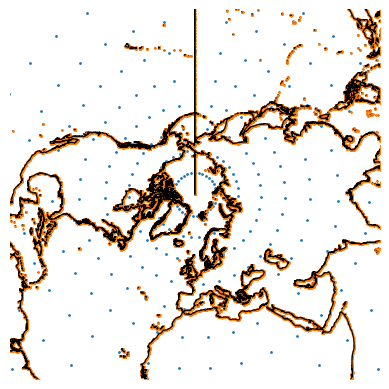

In [203]:
# Define projection
# transform_proj = pyproj.Proj(proj="adams_ws2",lat_0=0,lon_0=0)
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_alpha=40, lon_0=115,y_0=9000000) 
transform_proj = pyproj.Proj(proj="ob_tran", o_proj="adams_ws2", o_lat_p=30, o_lon_p=115, lon_0=115, lat_0=-50) 
transform_proj = pyproj.Proj(proj="stere", lat_0=90, lat_ts=75) 

# Create a regular grid of points covering the world
lons = np.linspace(-180, 180, 36)
lats = np.linspace(-90, 90, 18)

# Create a meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Flatten the grids for processing
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

lat_off = 0
lon_off = 0
lon_flat,lat_flat = transform(lon_flat,lat_flat,lon_off,lat_off)
w_lon,w_lat = transform(world_points['x'],world_points['y'],lon_off,lat_off)

x,y = transform_proj(lon_flat,lat_flat)
w_x,w_y = transform_proj(world_points['x'],world_points['y'])

angle = 0

x_rot,y_rot = rotator(x,y,angle)
w_x_rot,w_y_rot = rotator(w_x,w_y,angle)

# Project country geometries
plt.figure()
plt.scatter(x_rot,y_rot,s=1)
plt.scatter(w_x_rot,w_y_rot,s=0.2)
world_new = world.to_crs(transform_proj.srs)
world_new.boundary.plot(ax=plt.gca(), color='black', linewidth=0.8)
plt.xlim([-10000000,10000000])
plt.ylim([-10000000,10000000])
plt.axis('off')
plt.show()

